In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Load data
from src.data_loader import load_anime_dataset
ratings, anime = load_anime_dataset()

print("Ratings shape:", ratings.shape)
print(ratings.head())
print("Anime shape:", anime.shape)
print(anime.head())

Ratings shape: (56665273, 3)
   user_id  anime_id  rating
0        0       430       9
1        0      1004       5
2        0      3010       7
3        0       570       7
4        0      2762       9
Anime shape: (16208, 35)
   MAL_ID                             Name Score  \
0       1                     Cowboy Bebop  8.78   
1       5  Cowboy Bebop: Tengoku no Tobira  8.39   
2       6                           Trigun  8.24   
3       7               Witch Hunter Robin  7.27   
4       8                   Bouken Ou Beet  6.98   

                                              Genres            English name  \
0    Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1              Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   
2  Action, Sci-Fi, Adventure, Comedy, Drama, Shounen                  Trigun   
3  Action, Mystery, Police, Supernatural, Drama, ...      Witch Hunter Robin   
4          Adventure, Fantasy, Shounen, Supernatural  Beet 

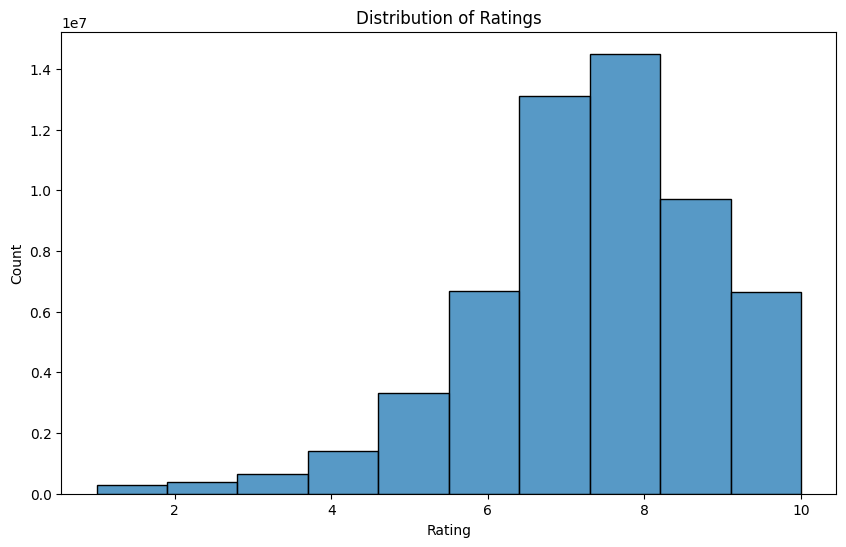

In [16]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

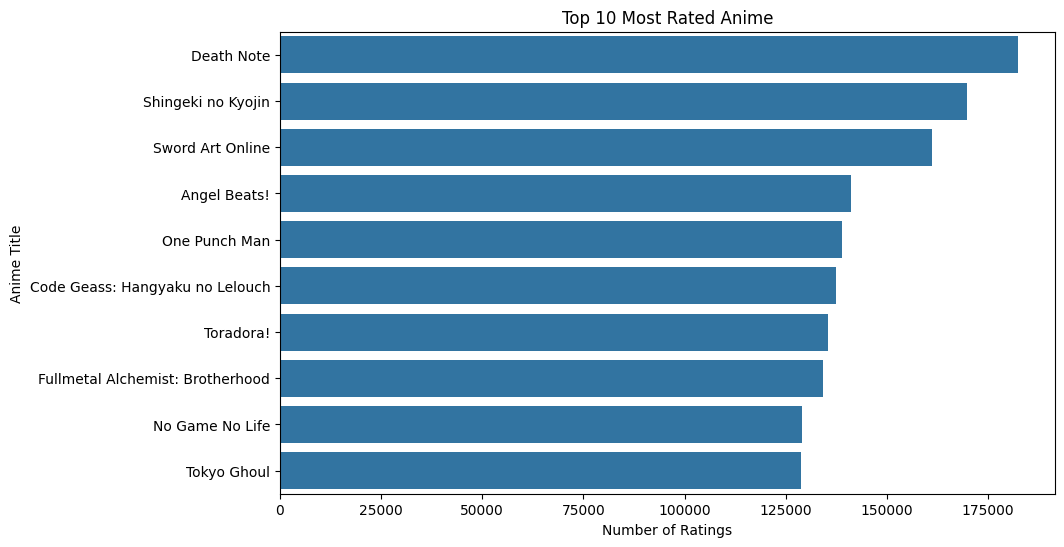

In [15]:
# top 10 most rated anime
anime_counts = ratings['anime_id'].value_counts().head(10)
top_anime = anime[anime['MAL_ID'].isin(anime_counts.index)]
top_anime = top_anime.set_index('MAL_ID').loc[anime_counts.index]
top_anime['num_ratings'] = anime_counts.values

plt.figure(figsize=(10, 6))
sns.barplot(data=top_anime, x='num_ratings', y='Name')
plt.title("Top 10 Most Rated Anime")
plt.xlabel("Number of Ratings")
plt.ylabel("Anime Title")
plt.show()

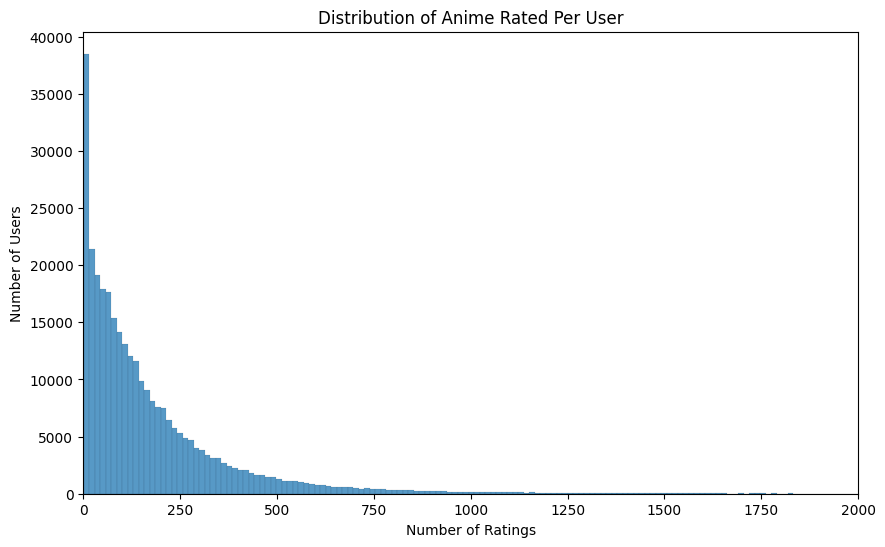

In [27]:
# Distribution of ratings per anime
user_counts = ratings['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(user_counts, bins=1000)
plt.title("Distribution of Anime Rated Per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.xlim(0, 2000)
plt.show()

In [28]:
# Missing values
missing_ratings = ratings.isnull().sum()
print("\nMissing values in ratings:\n", missing_ratings)

missing_anime = anime.isnull().sum()
print("\nMissing values in anime:\n", missing_anime)


Missing values in ratings:
 user_id     0
anime_id    0
rating      0
dtype: int64

Missing values in anime:
 MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64
